In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
anime = pd.read_csv("anime.csv", encoding='cp1252')
print(anime.head())

   anime_id                                               name genre.1  \
0     32281                                     Kimi no Na wa.   Drama   
1      5114                   Fullmetal Alchemist: Brotherhood  Action   
2     28977                                           Gintama°  Action   
3      9969                                      Gintama&#039;  Action   
4     32935  Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...  Comedy   

      genre.2      genre.3        genre.4   type  episodes  rating  members  \
0     Romance       School   Supernatural  Movie         1    9.37   200630   
1   Adventure        Drama        Fantasy     TV        64    9.26   793665   
2      Comedy   Historical         Parody     TV        51    9.25   114262   
3      Comedy   Historical         Parody     TV        51    9.16   151266   
4       Drama       School        Shounen     TV        10    9.15    93351   

  PopularityLevel  
0         Average  
1         Popular  
2         Average  


In [6]:
# Shape of the data
anime.shape
# Information of the dataset
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4038 entries, 0 to 4037
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         4038 non-null   int64  
 1   name             4038 non-null   object 
 2   genre.1          4038 non-null   object 
 3   genre.2          4038 non-null   object 
 4   genre.3          4038 non-null   object 
 5   genre.4          4038 non-null   object 
 6   type             4038 non-null   object 
 7   episodes         4038 non-null   int64  
 8   rating           4038 non-null   float64
 9   members          4038 non-null   int64  
 10  PopularityLevel  4038 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 347.1+ KB


In [7]:
# Data Statistics
anime.describe()
# Missing values of dataset
missing_values = anime.isnull().sum()
print(missing_values)

anime_id           0
name               0
genre.1            0
genre.2            0
genre.3            0
genre.4            0
type               0
episodes           0
rating             0
members            0
PopularityLevel    0
dtype: int64


In [8]:
# Examining the dataset for duplicaterows and dropping the duplicates
duplicate_rows= anime.duplicated().sum()
print(duplicate_rows)
anime.drop_duplicates()

0


,anime_id,name,genre.1,genre.2,genre.3,genre.4,type,episodes,rating,members,PopularityLevel
0,32281,Kimi no Na wa.,Drama,Romance,School,Supernatural,Movie,1,9.37,200630,Average
1,5114,Fullmetal Alchemist: Brotherhood,Action,Adventure,Drama,Fantasy,TV,64,9.26,793665,Popular
2,28977,Gintama°,Action,Comedy,Historical,Parody,TV,51,9.25,114262,Average
3,9969,Gintama&#039;,Action,Comedy,Historical,Parody,TV,51,9.16,151266,Average
4,32935,Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...,Comedy,Drama,School,Shounen,TV,10,9.15,93351,Less Known
...,...,...,...,...,...,...,...,...,...,...,...
4033,9851,O-parts: Oman,Action,Comedy,Hentai,Mecha,Special,1,5.31,488,Unpopular
4034,2592,Kimera,Action,Horror,Sci-Fi,Supernatural,OVA,1,5.29,3374,Unpopular
4035,30663,Docchi mo Maid,Action,Comedy,Ecchi,Yuri,ONA,1,5.15,223,Unpopular
4036,4369,Kunoichi Gakuen Ninpouchou,Action,Comedy,Demons,Hentai,OVA,6,5.11,955,Unpopular


In [9]:
# 2. Handle missing values in anime.csv
# Fill missing ratings with average rating
anime['rating'] = anime['rating'].fillna(anime['rating'].mean())
# Replace missing or empty 'type' with 'Unknown'
anime['type'] = anime['type'].fillna('Unknown')
anime['type'] = anime['type'].replace('', 'Unknown')

In [11]:
#1.Top10 most popularanime
top_popular= anime.sort_values(by='members',ascending=False).head(10)
print("Top10 Most PopularAnime:")
print(top_popular[['name','members']])

Top10 Most PopularAnime:
                                 name  members
35                         Death Note  1013917
68                 Shingeki no Kyojin   896229
571                  Sword Art Online   893100
1    Fullmetal Alchemist: Brotherhood   793665
123                      Angel Beats!   717796
15    Code Geass: Hangyaku no Lelouch   715151
595                            Naruto   683297
319                  Mirai Nikki (TV)   657190
98                          Toradora!   633817
411                            Bleach   624055


In [12]:
#2.Top10 highest-ratedanime
top_rated =anime[anime['rating'].notnull()].sort_values(by='rating', ascending=False).head(10)
print("Top10 Highest-RatedAnime:")
print(top_rated[['name', 'rating']])

Top10 Highest-RatedAnime:
                                                name  rating
0                                     Kimi no Na wa.    9.37
1                   Fullmetal Alchemist: Brotherhood    9.26
2                                           Gintama°    9.25
3                                      Gintama&#039;    9.16
4  Haikyuu!!: Karasuno Koukou VS Shiratorizawa Ga...    9.15
5                             Hunter x Hunter (2011)    9.13
6                               Ginga Eiyuu Densetsu    9.11
8                           Gintama&#039;: Enchousen    9.11
7  Gintama Movie: Kanketsu-hen - Yorozuya yo Eien...    9.10
9                               Clannad: After Story    9.06


In [13]:
#3.Countofanime bytype
anime_type_count =anime['type'].value_counts()
print("AnimeCount byType:")
print(anime_type_count)

AnimeCount byType:
type
TV         1746
OVA         949
Movie       717
Special     524
ONA          71
Music        31
Name: count, dtype: int64


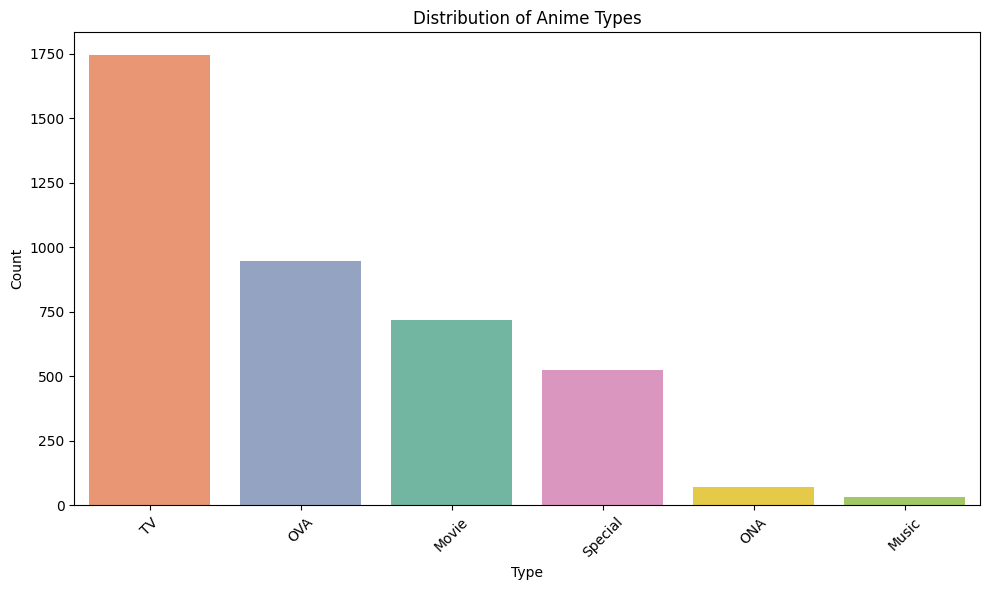

In [15]:
 # 6. Distribution of Anime Types (TV, Movie, OVA, etc.)
plt.figure(figsize=(10,6))
sns.countplot(data=anime, x='type', hue='type', order=anime['type'].value_counts().index, palette='Set2', legend=False)
plt.title('Distribution of Anime Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

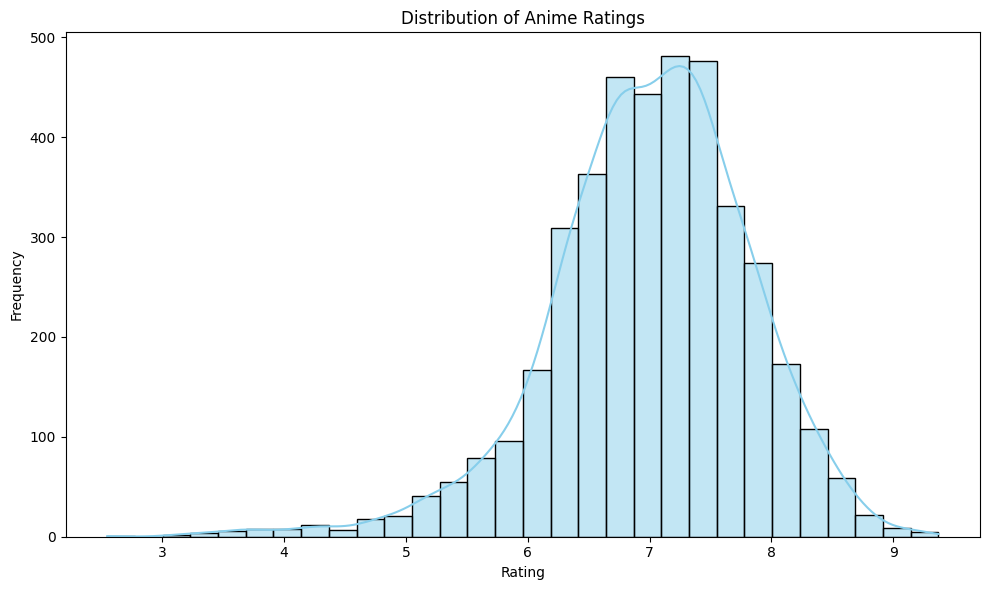

In [16]:
# 7. Distribution of Ratings
plt.figure(figsize=(10,6))
sns.histplot(anime['rating'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Anime Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

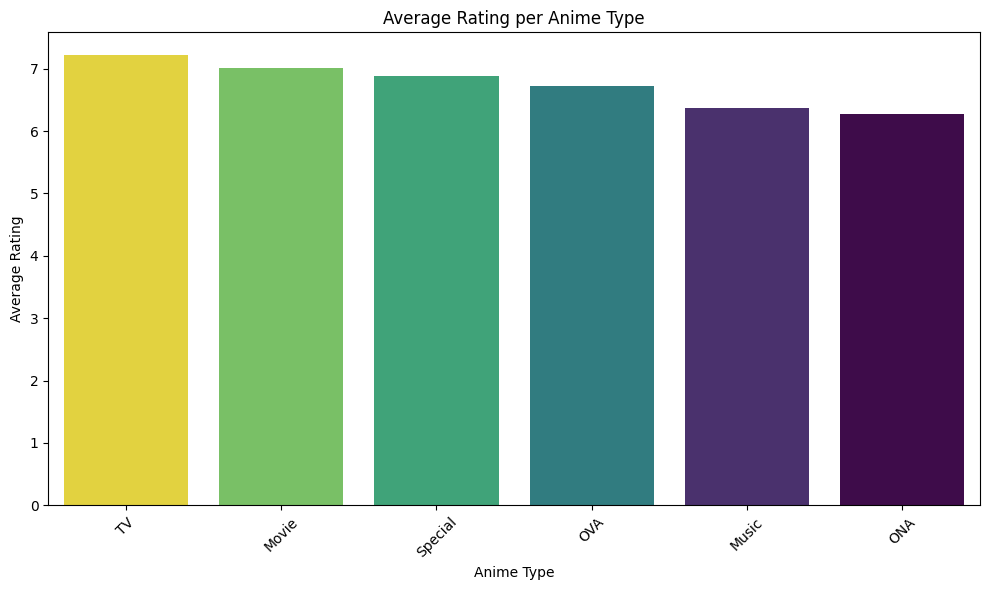

In [17]:
 # 7. Average Rating per Anime Type
 # Group and calculate mean rating
avg_rating_by_type = anime.groupby('type')['rating'].mean().sort_values(ascending=False)
 # Plot
plt.figure(figsize=(10,6))
sns.barplot(x=avg_rating_by_type.index, y=avg_rating_by_type.values,palette='viridis',hue=avg_rating_by_type.values,legend=False)
plt.title('Average Rating per Anime Type')
plt.xlabel('Anime Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

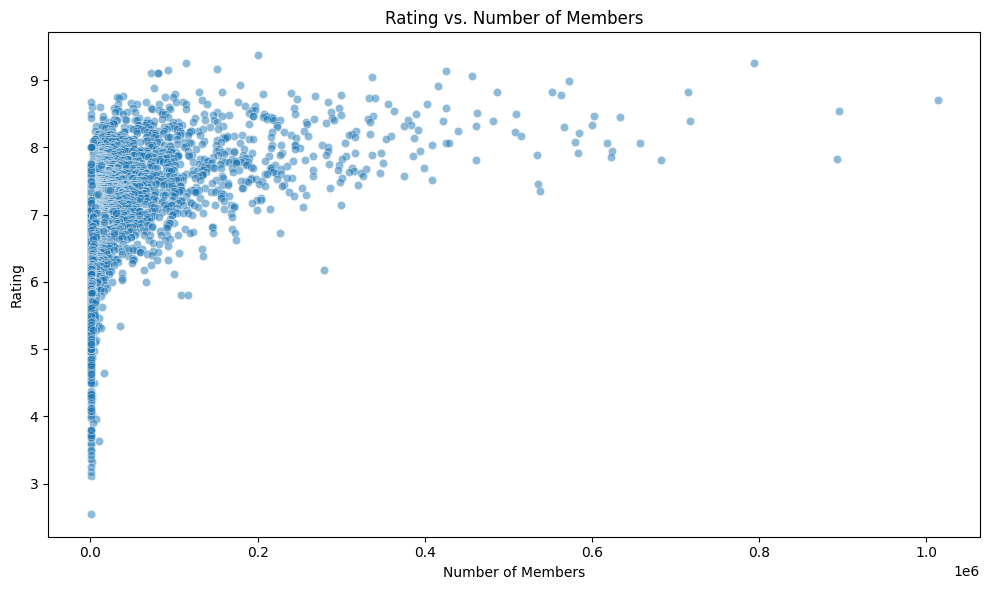

In [18]:
# 8. Members vs Rating (Popularity vs Quality)
plt.figure(figsize=(10,6))
sns.scatterplot(data=anime, x='members', y='rating', alpha=0.5)
plt.title('Rating vs. Number of Members')
plt.xlabel('Number of Members')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()

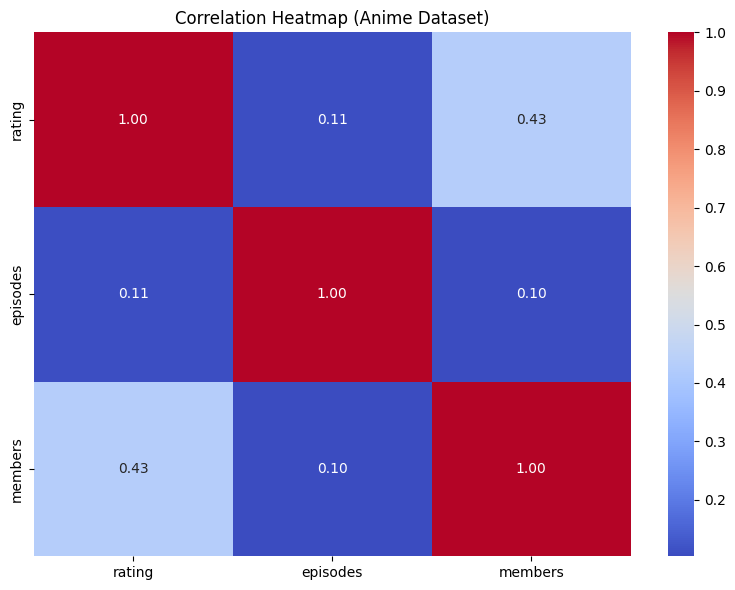

In [19]:
 # Convert episodes to numeric
anime['episodes'] = pd.to_numeric(anime['episodes'], errors='coerce')
# Select numeric columns for correlation
numeric_cols = anime[['rating', 'episodes', 'members']].dropna()
# Compute correlation matrix
corr_matrix = numeric_cols.corr()
# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Anime Dataset)')
plt.tight_layout()
plt.show()

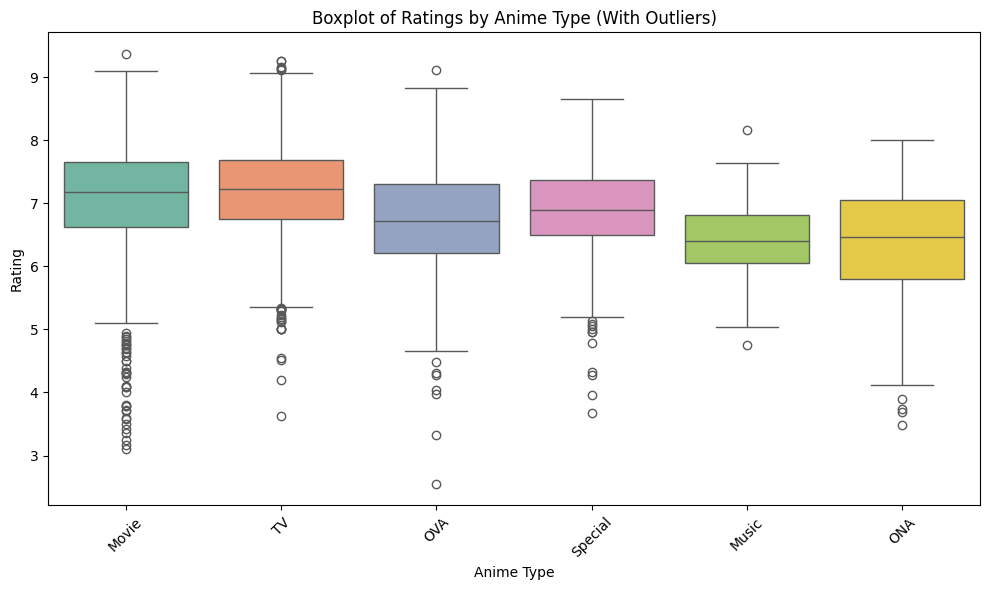

In [21]:
# 10. Box Plot of Ratings by Anime Type
# Drop missing values in 'rating' and 'type'
anime_clean = anime[anime['type'] != 'Unknown']
plt.figure(figsize=(10,6))
sns.boxplot(data=anime_clean, x='type', y='rating', palette='Set2',hue='type',legend=False)
plt.title('Boxplot of Ratings by Anime Type (With Outliers)')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

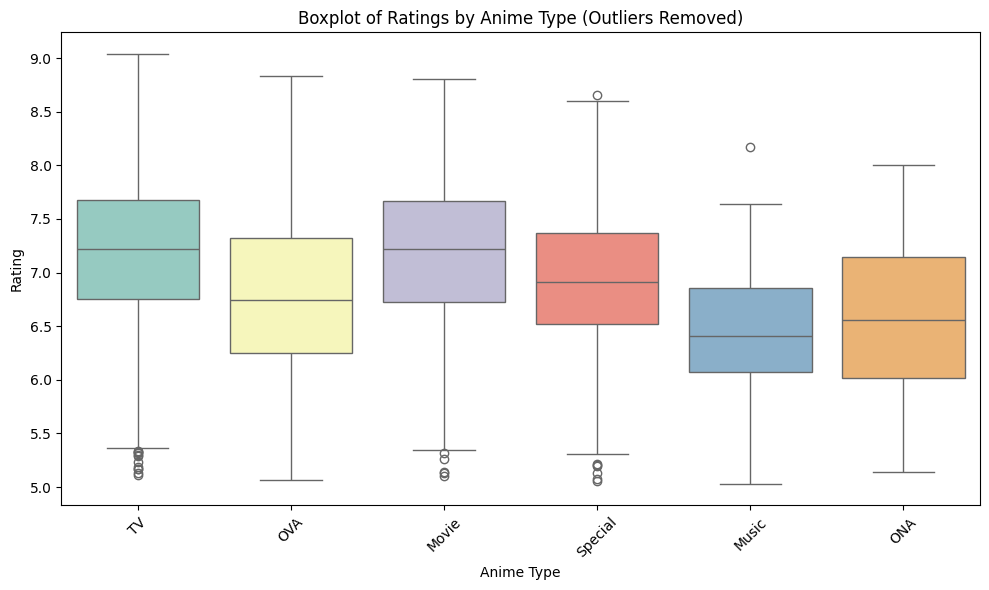

In [22]:
# 11. After removing outliers
# Drop missing values in 'rating' and 'type'
anime_clean = anime[anime['type'] != 'Unknown']
# Remove outliers using IQR
Q1 = anime_clean['rating'].quantile(0.25)
Q3 = anime_clean['rating'].quantile(0.75)
IQR = Q3- Q1
# Filter ratings within 1.5*IQR
filtered = anime_clean[(anime_clean['rating'] >= Q1- 1.5 * IQR) &(anime_clean['rating'] <= Q3 + 1.5 * IQR)]
# Boxplot
plt.figure(figsize=(10,6))
sns.boxplot(data=filtered, x='type', y='rating',palette='Set3',hue='type',legend=False)
plt.title('Boxplot of Ratings by Anime Type (Outliers Removed)')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

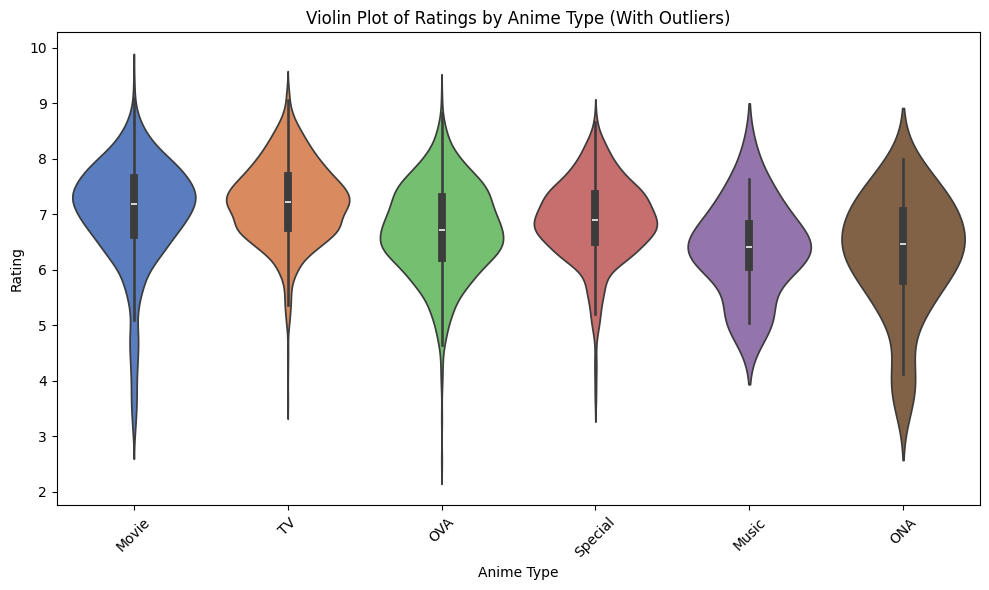

In [24]:
# 12. Violin Plot of Ratings by Anime Type (With Outliers)
# Drop missing values in 'rating' and 'type'
anime_clean = anime[anime['type'] != 'Unknown']
# Plot violin plot
plt.figure(figsize=(10,6))
sns.violinplot(data=anime_clean, x='type', y='rating',palette='muted',hue='type',legend=False)
plt.title('Violin Plot of Ratings by Anime Type (With Outliers)')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

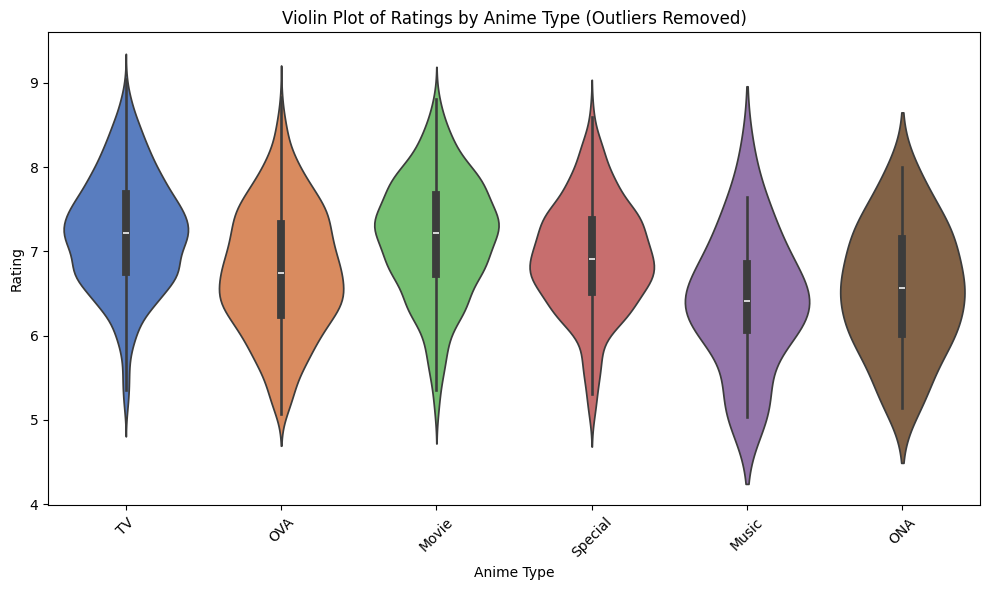

In [25]:
# removing outliers
# Drop missing values in 'rating' and 'type'
anime_clean = anime[anime['type'] != 'Unknown']
# Remove outliers using IQR
Q1 = anime_clean['rating'].quantile(0.25)
Q3 = anime_clean['rating'].quantile(0.75)
IQR = Q3- Q1
filtered = anime_clean[(anime_clean['rating'] >= Q1- 1.5 * IQR) &(anime_clean['rating'] <= Q3 + 1.5 * IQR)]
# Violin plot without outliers
plt.figure(figsize=(10,6))
sns.violinplot(data=filtered, x='type', y='rating',palette='muted',hue='type',legend=False)
plt.title('Violin Plot of Ratings by Anime Type (Outliers Removed)')
plt.xlabel('Anime Type')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# 16. Proportion of Anime by Type (TV, Movie, OVA, etc.)
# Count anime by type
type_counts = anime['type'].value_counts()
# Plot pie chart
plt.figure(figsize=(12,5))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%',startangle=140, colors=plt.cm.Set2.colors)
plt.title('Proportion of Anime by Type')
plt.axis('equal')
plt.show()